در این قسمت موارد ارزیابی پیاده سازی شده است .


In [25]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,RocCurveDisplay,accuracy_score

def show_metric(y_test,Predicted_labels):
  
    confu = confusion_matrix(y_test,Predicted_labels,labels=None)
    disp = ConfusionMatrixDisplay(confusion_matrix=confu,display_labels=["0","1"])
    disp.plot()
    ACC = accuracy_score(y_test,Predicted_labels)
    # Rec = recall_score(y_test,Predicted_labels)
    Precision = precision_score(y_test,Predicted_labels,average=None)
    f1score = f1_score(y_test,Predicted_labels,average=None)
    # print("ACC is :",ACC ,"\nRec is :",Rec,"\nPersision is : ",Precision,"\nF1 Score is :",f1score)
    print("ACC is :",ACC ,"\nPersision is : ",Precision,"\nF1 Score is :",f1score)

خواند دیتاست 

In [3]:
import pandas as pd

filename = "dataset.csv"

data = pd.read_csv(filename)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
labels = data['target']
feature = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [6]:
feature.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


برسی ستون‌های که مقدارتهی ممکن هست داشته باشند

In [7]:

null_columns = feature.columns[feature.isnull().any()]

print("The following columns have null values:")
for col in null_columns:
    print(col)

The following columns have null values:


بررسی تایپ ستون‌ها

In [8]:
dtypes = feature.dtypes

for col_name, dtype in dtypes.items():
    print("Column {} has type {}".format(col_name, dtype))
    if dtype == 'object':
        print("   Column {} has discrete values: {}".format(col_name, feature[col_name].unique()))


Column age has type int64
Column sex has type int64
Column cp has type int64
Column trestbps has type int64
Column chol has type int64
Column fbs has type int64
Column restecg has type int64
Column thalach has type int64
Column exang has type int64
Column oldpeak has type float64
Column slope has type int64
Column ca has type int64
Column thal has type int64


بررسی متغیرهای گسسته

In [10]:
doubt_col = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
for col_name in doubt_col:
          print("   Column {} has discrete values: {}".format(col_name, feature[col_name].unique()))


   Column sex has discrete values: [1 0]
   Column cp has discrete values: [3 2 1 0]
   Column fbs has discrete values: [1 0]
   Column restecg has discrete values: [0 1 2]
   Column exang has discrete values: [0 1]
   Column slope has discrete values: [0 2 1]
   Column ca has discrete values: [0 2 1 3 4]
   Column thal has discrete values: [1 2 3 0]


In [12]:
len(feature)

303

انجام کدینگ بر روی داده‌های گسسته

In [14]:
list_categorical = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

df_one_hot = pd.get_dummies(feature, columns=list_categorical)


In [15]:
df_one_hot

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [16]:
df_one_hot['label'] = labels

In [17]:
df_one_hot

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,label
0,63,145,233,150,2.3,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,37,130,250,187,3.5,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
2,41,130,204,172,1.4,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
3,56,120,236,178,0.8,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,1
4,57,120,354,163,0.6,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
299,45,110,264,132,1.2,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300,68,144,193,141,3.4,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
301,57,130,131,115,1.2,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [18]:
df_one_hot.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'label'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
train_df, test_df = train_test_split(df_one_hot, test_size=0.2, random_state=42)

train_x = train_df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3',]]
train_y = train_df['label']

test_x = test_df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3',]]

text_y = test_df['label']

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC,LinearSVC


In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_fit_train = scaler.fit(train_x)
scaled_X_train = scaled_fit_train.transform(train_x)
scaled_X_test = scaled_fit_train.transform(test_x)




ACC is : 0.8360655737704918 
Persision is :  [0.80645161 0.86666667] 
F1 Score is : [0.83333333 0.83870968]


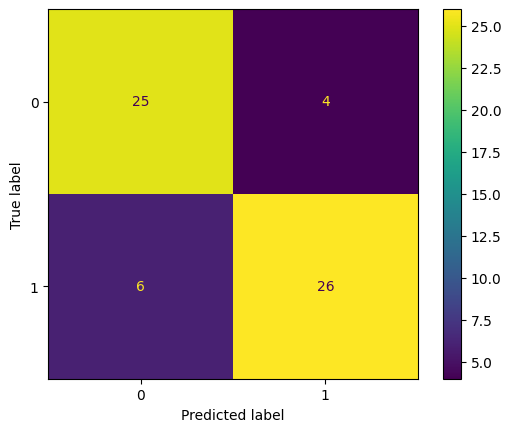

In [26]:
#SVM linear
svm_linear = SVC(kernel='linear')
svm_linear.fit(scaled_X_train, train_y.to_numpy().astype('int'))
predicted_labels_linear_svm= svm_linear.predict(scaled_X_test)
show_metric(text_y.to_numpy().astype('int'),predicted_labels_linear_svm)



ACC is : 0.8360655737704918 
Persision is :  [0.78787879 0.89285714] 
F1 Score is : [0.83870968 0.83333333]


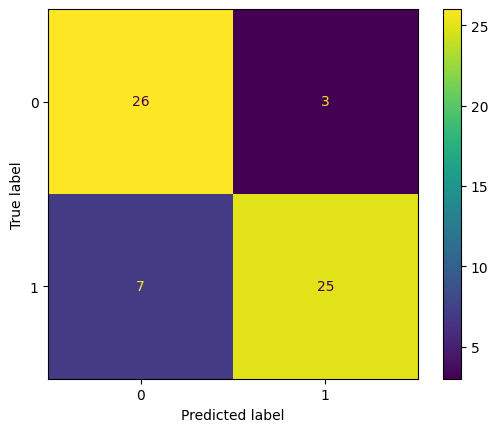

In [27]:
#SVM linear
svm_linear = SVC(kernel='linear',C=10)
svm_linear.fit(scaled_X_train, train_y.to_numpy().astype('int'))
predicted_labels_linear_svm= svm_linear.predict(scaled_X_test)
show_metric(text_y.to_numpy().astype('int'),predicted_labels_linear_svm)



ACC is : 0.8360655737704918 
Persision is :  [0.85185185 0.82352941] 
F1 Score is : [0.82142857 0.84848485]


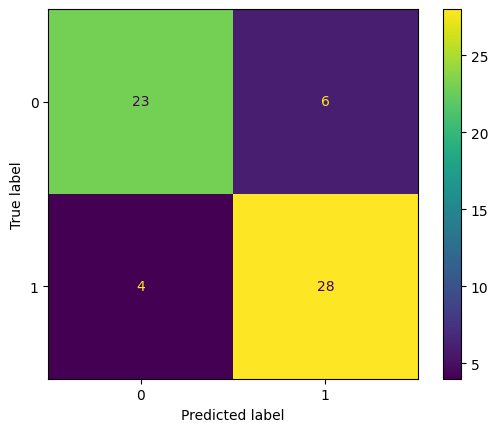

In [28]:
#SVM rbf
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(scaled_X_train, train_y.to_numpy().astype('int'))
predicted_labels_rbf_svm= svm_rbf.predict(scaled_X_test)
show_metric(text_y.to_numpy().astype('int'),predicted_labels_rbf_svm)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ACC is : 0.5245901639344263 
Persision is :  [0.         0.52459016] 
F1 Score is : [0.         0.68817204]


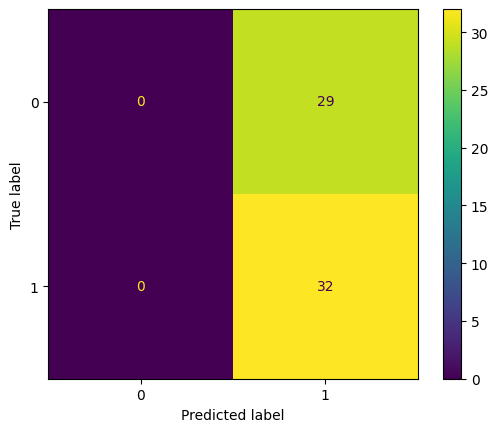

In [29]:
#SVM rbf
svm_rbf = SVC(kernel='rbf',C=0.1,gamma=10)
svm_rbf.fit(scaled_X_train, train_y.to_numpy().astype('int'))
predicted_labels_rbf_svm= svm_rbf.predict(scaled_X_test)
show_metric(text_y.to_numpy().astype('int'),predicted_labels_rbf_svm)



ACC is : 0.8688524590163934 
Persision is :  [0.88888889 0.85294118] 
F1 Score is : [0.85714286 0.87878788]


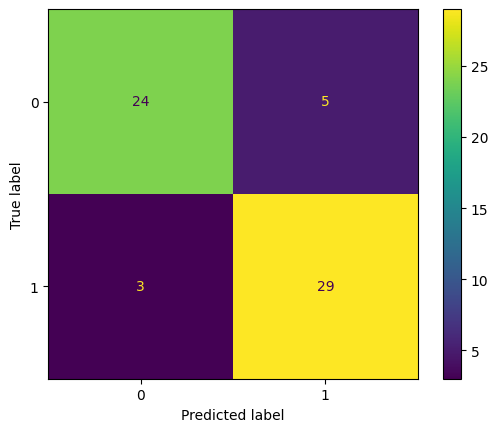

In [30]:
#SVM poly

svm_poly = SVC(kernel='poly')
svm_poly.fit(scaled_X_train, train_y.to_numpy().astype('int'))
predicted_labels_poly_svm= svm_poly.predict(scaled_X_test)
show_metric(text_y.to_numpy().astype('int'),predicted_labels_poly_svm)


ACC is : 0.8524590163934426 
Persision is :  [0.91666667 0.81081081] 
F1 Score is : [0.83018868 0.86956522]


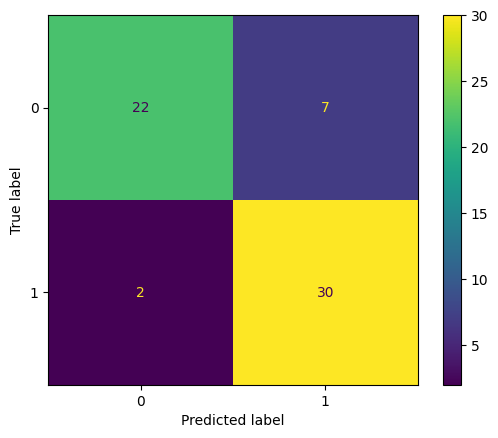

In [31]:
svm_poly = SVC(kernel='poly',degree=4,C=10)
svm_poly.fit(scaled_X_train, train_y.to_numpy().astype('int'))
predicted_labels_poly_svm= svm_poly.predict(scaled_X_test)
show_metric(text_y.to_numpy().astype('int'),predicted_labels_poly_svm)


ACC is : 0.8852459016393442 
Persision is :  [0.82352941 0.96296296] 
F1 Score is : [0.88888889 0.88135593]


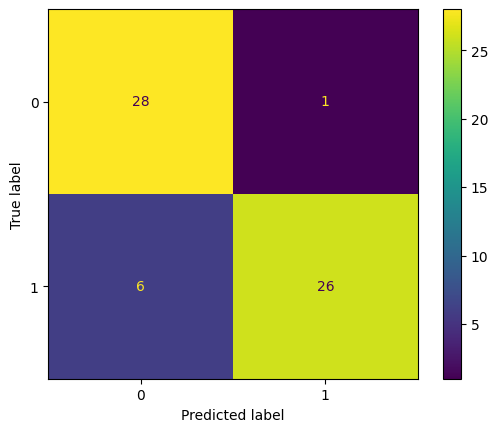

In [32]:
#SVM Sigmoid
svm_Sigmoid = SVC(kernel='sigmoid',C=0.1,gamma=10)
svm_Sigmoid.fit(scaled_X_train, train_y.to_numpy().astype('int'))
predicted_labels_Sigmoid_svm= svm_Sigmoid.predict(scaled_X_test)
show_metric(text_y.to_numpy().astype('int'),predicted_labels_Sigmoid_svm)



ACC is : 0.7377049180327869 
Persision is :  [0.70967742 0.76666667] 
F1 Score is : [0.73333333 0.74193548]


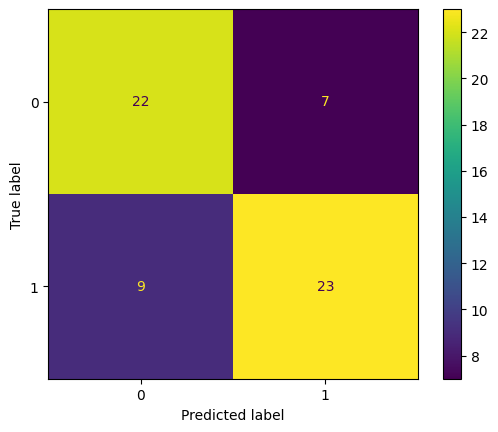

In [33]:
svm_Sigmoid = SVC(kernel='sigmoid',C=10,gamma=10)
svm_Sigmoid.fit(scaled_X_train, train_y.to_numpy().astype('int'))
predicted_labels_Sigmoid_svm= svm_Sigmoid.predict(scaled_X_test)
show_metric(text_y.to_numpy().astype('int'),predicted_labels_Sigmoid_svm)


In [ ]:
# scaled_X_train

In [34]:

def experiment_model(X_train,y_train,y_test,X_test):
    result_list = []
    # Define the parameter grid for gamma and C
    param_grid = {'gamma': [0.01,0.1, 1, 10,100,'scale'], 'C': [0.01,0.1, 1, 10,100]}

    # Initialize the SVM with a rbf kernel
    svm_model = SVC(kernel='rbf')
    clf_one = GridSearchCV(estimator=svm_model, param_grid=param_grid)
    clf_one.fit(X_train, y_train)
    Predicted_labels= clf_one.predict(X_test)
    result_list.append((Predicted_labels,clf_one))
    print(f"SVM , Kernal = RBF , Best parameters: {clf_one.best_params_}")

    # Define the parameter grid for gamma and C
    param_grid = {'C': [0.1, 1, 10,100]}
    svm_model = SVC(kernel='linear')
    clf_two = GridSearchCV(estimator=svm_model, param_grid=param_grid)
    clf_two.fit(X_train, y_train)
    Predicted_labels= clf_two.predict(X_test)
    result_list.append((Predicted_labels,clf_two))
    print(f"SVM , Kernel = Linear ,Best parameters: {clf_two.best_params_}")


    # Initialize the SVM with a polynomial kernel
    param_grid = {"degree": [2, 3, 4],"C": [0.01,0.1, 1, 10,100]}
    svm_model = SVC(kernel='poly')
    clf_five = GridSearchCV(estimator=svm_model, param_grid=param_grid)
    clf_five.fit(X_train, y_train)
    Predicted_labels= clf_five.predict(X_test)
    result_list.append((Predicted_labels,clf_five))
    print(f"SVM , Kernel = Poly , Best parameters: {clf_five.best_params_}")

    
    param_grid = {'gamma': [0.01,0.1, 1, 10,100], 'C': [0.01,0.1, 1, 10,100]}
    # Initialize the SVM with a Sigmoid kernel
    svm_model = SVC(kernel='sigmoid')
    clf_six = GridSearchCV(estimator=svm_model, param_grid=param_grid)
    clf_six.fit(X_train, y_train)
    Predicted_labels= clf_six.predict(X_test)
    result_list.append((Predicted_labels,clf_six))
    print(f"SVM , Kernel = Sigmoid , Best parameters: {clf_six.best_params_}")





    return result_list

In [35]:
result_list = experiment_model(scaled_X_train,train_y.to_numpy().astype('int'),text_y.to_numpy().astype('int'),scaled_X_test)

SVM , Kernal = RBF , Best parameters: {'C': 0.1, 'gamma': 0.01}
SVM , Kernel = Linear ,Best parameters: {'C': 1}
SVM , Kernel = Poly , Best parameters: {'C': 1, 'degree': 3}
SVM , Kernel = Sigmoid , Best parameters: {'C': 0.01, 'gamma': 1}


In [36]:
print(result_list)

[(array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]), GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100, 'scale']})), (array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]), GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100]})), (array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]), GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4]})), (ar

ACC is : 0.8688524590163934 
Persision is :  [0.88888889 0.85294118] 
F1 Score is : [0.85714286 0.87878788]


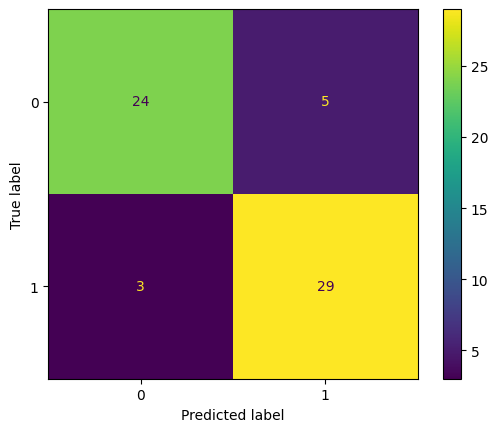

In [37]:
# SVM rbf
show_metric(text_y.to_numpy().astype('int'),result_list[0][0])

ACC is : 0.8360655737704918 
Persision is :  [0.80645161 0.86666667] 
F1 Score is : [0.83333333 0.83870968]


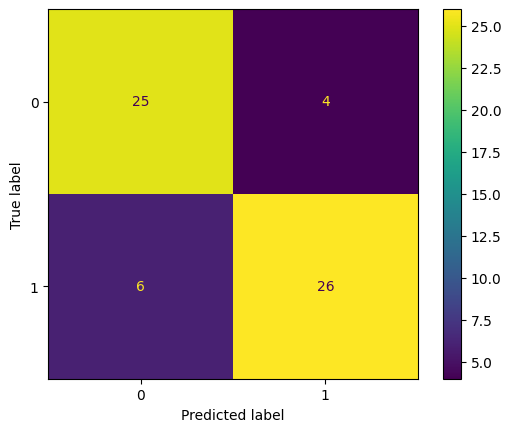

In [38]:
# SVM linear
show_metric(text_y.to_numpy().astype('int'),result_list[1][0])

ACC is : 0.8688524590163934 
Persision is :  [0.88888889 0.85294118] 
F1 Score is : [0.85714286 0.87878788]


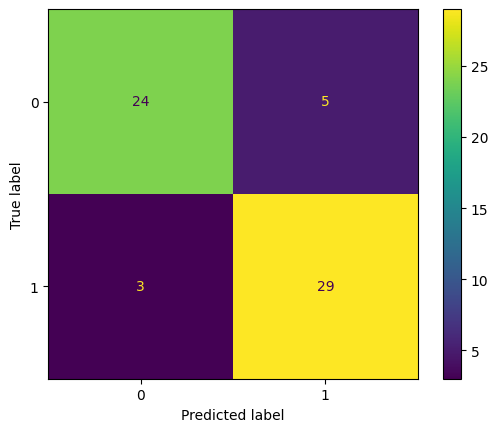

In [39]:
#SVM polynomial
show_metric(text_y.to_numpy().astype('int'),result_list[2][0])

ACC is : 0.8852459016393442 
Persision is :  [0.84375    0.93103448] 
F1 Score is : [0.8852459 0.8852459]


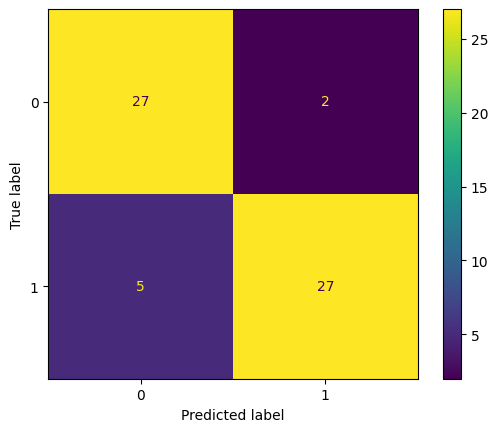

In [40]:
#SVM sigmoid
show_metric(text_y.to_numpy().astype('int'),result_list[3][0])

In [41]:
import numpy as np
from sklearn.decomposition import PCA

# assume X is your numpy array
pca = PCA(n_components=2) # set the number of principal components you want to retain
X_pca_fit = pca.fit(scaled_X_train) # transform the data to the new coordinate system
X_pca = X_pca_fit.transform(scaled_X_train)
# view the amount of variance explained by each principal component
print(pca.explained_variance_ratio_)

[0.16159012 0.08779442]


In [42]:
X_pca_test = X_pca_fit.transform(scaled_X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ACC is : 0.8688524590163934 
Persision is :  [0.81818182 0.92857143] 
F1 Score is : [0.87096774 0.86666667]


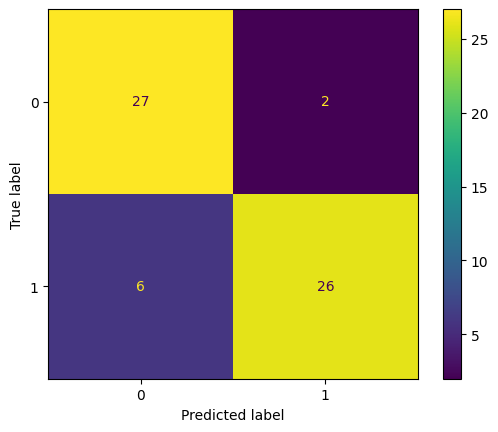

In [43]:
# Initialize the SVM with a polynomial kernel
y = train_y.to_numpy().astype('int').reshape(-1,1)
svm_model = SVC(kernel='sigmoid',C=0.01,gamma=1)
svm_model.fit(X_pca,y )
Predicted_labels= svm_model.predict(X_pca_test)
show_metric(text_y.to_numpy().astype('int'),Predicted_labels)


بررسی فضای حالتی که توسط مدل باعث تقسیم بندی فضا شده است 

TypeError: ignored

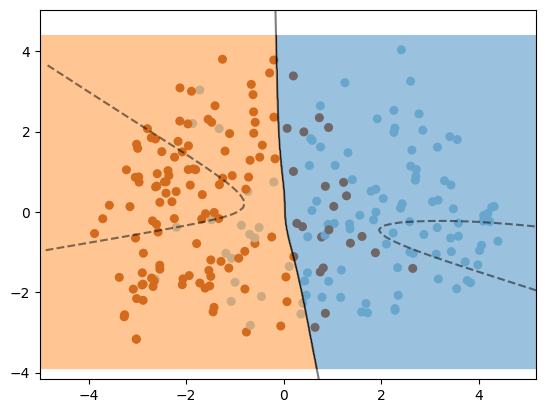

In [44]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=30, cmap=plt.cm.Paired)


# plot the decision function
ax = plt.gca()

# plot the decision function
DecisionBoundaryDisplay.from_estimator(
    svm_model,
    X_pca,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-"],
    ax=ax,
)
y_test = text_y.to_numpy().astype('int')
# # plot decision regions
plot_decision_regions(X_pca_test, y_test, clf=svm_model, 
                      legend=2, # place legend at upper left corner
                     )
# Add axis labels and a title
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('SVM Decision Regions of poly')

# Set the lower limit on the y-axis

# Show the plot
plt.show()

In [45]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=51f937de9f9504acd7b138ae8f8092c1d2e7332d30c65ed471fc6d0588bd09e6
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [46]:
from sklearn.metrics import roc_curve, auc

In [47]:
Predicted_labels

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
num_classes = 2
# define classes
classes = [0, 1]

num_samples = len(y_test)
one_hot = np.zeros((num_samples, num_classes))

for i, val in enumerate(y_test):
    print(val)
    class_index = classes.index(val)
    one_hot[i][class_index] = 1

# print(f"Classes: {classes}")
# print(f"Data: {data}")
print(f"One-hot encoded array:")
print(one_hot)


In [ ]:
num_classes = 2
# define classes
classes = [0, 1]

num_samples = len(train_y.to_numpy().astype('int'))
one_hot_train = np.zeros((num_samples, num_classes))

for i, val in enumerate(train_y.to_numpy().astype('int')):
    print(val)
    class_index = classes.index(val)
    one_hot_train[i][class_index] = 1

# print(f"Classes: {classes}")
# print(f"Data: {data}")
print(f"One-hot encoded array:")
print(one_hot_train)


In [51]:
svm_model = SVC(kernel='sigmoid',C=0.01,gamma=1,probability=True)
svm_model.fit(X_pca,y )


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.01, gamma=1, kernel='sigmoid', probability=True)

In [55]:
svm_Sigmoid = SVC(kernel='sigmoid',C=10,gamma=10,probability=True)
svm_Sigmoid.fit(X_pca,y)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, gamma=10, kernel='sigmoid', probability=True)

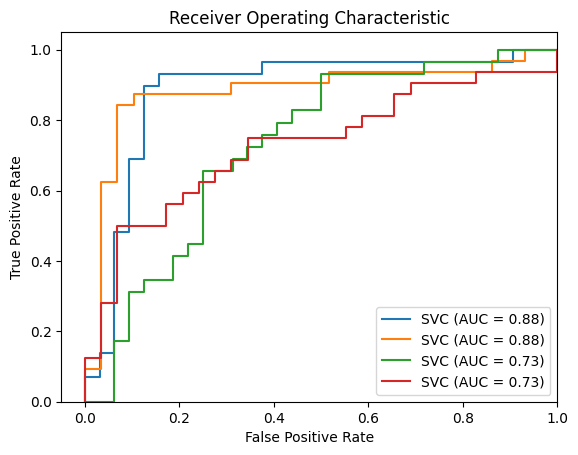

In [56]:
from sklearn.metrics import RocCurveDisplay, roc_curve
import matplotlib.pyplot as plt
y_test_enc = np.array(one_hot)
# Define the classes and the models you want to test
classes = ['class1', 'class2']
models = [svm_model,svm_Sigmoid]

# Initialize the plot
fig, ax = plt.subplots()
# Loop over the models and the classes
for model in models:
    for n in range(len(classes)):
        y_pred_proba = model.predict_proba(X_pca_test)
        fpr, tpr, _ = roc_curve(y_test_enc[:,n], y_pred_proba[:,n])
        roc_auc = auc(fpr, tpr)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model.__class__.__name__)
        roc_display.plot(ax=ax)

# Configure the plot
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc='lower right')

# Show the plot
plt.show()